In [2]:
from IPython.display import Image
import cv2
import numpy as np

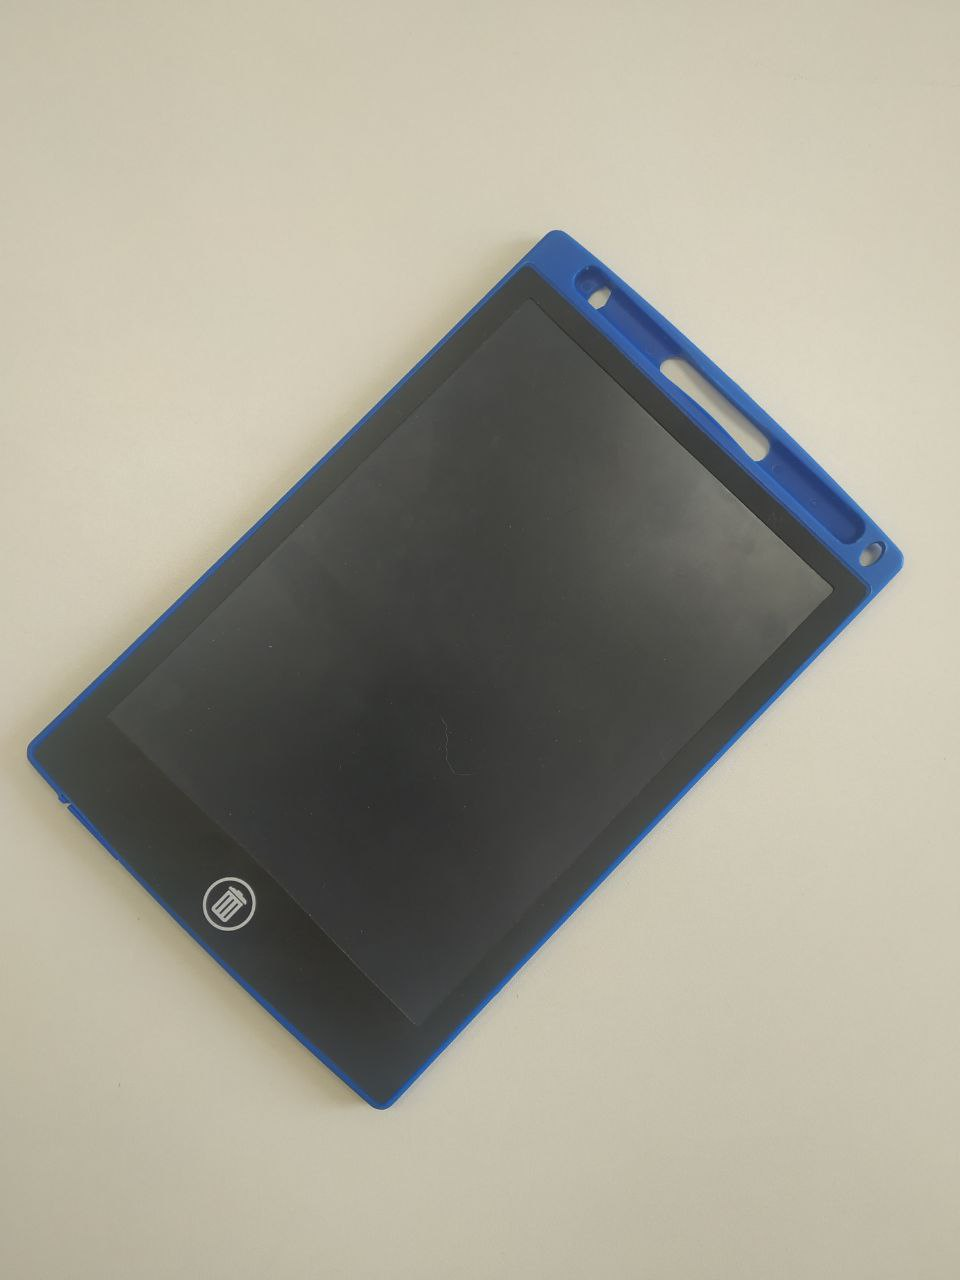

In [29]:
# Загружаем изображение
image = cv2.imread('../input_data_samples/photo/3.jpg')

# Преобразуем изображение в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Выводим на печать исходное изображение
retval, buffer = cv2.imencode('.png', image)
img_png = buffer.tobytes()
Image(data = img_png)


In [30]:
# Применяем алгоритм Кэнни для обнаружения контуров
edges = cv2.Canny(gray, 50, 150)

# Применяем морфологические операции для закрытия контуров
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Находим контуры на изображении
contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Ищем самый большой контур
largest_contour = max(contours, key=cv2.contourArea)

# Получаем вершины полигона
polygon_points = cv2.approxPolyDP(largest_contour, epsilon=0.1, closed=True)

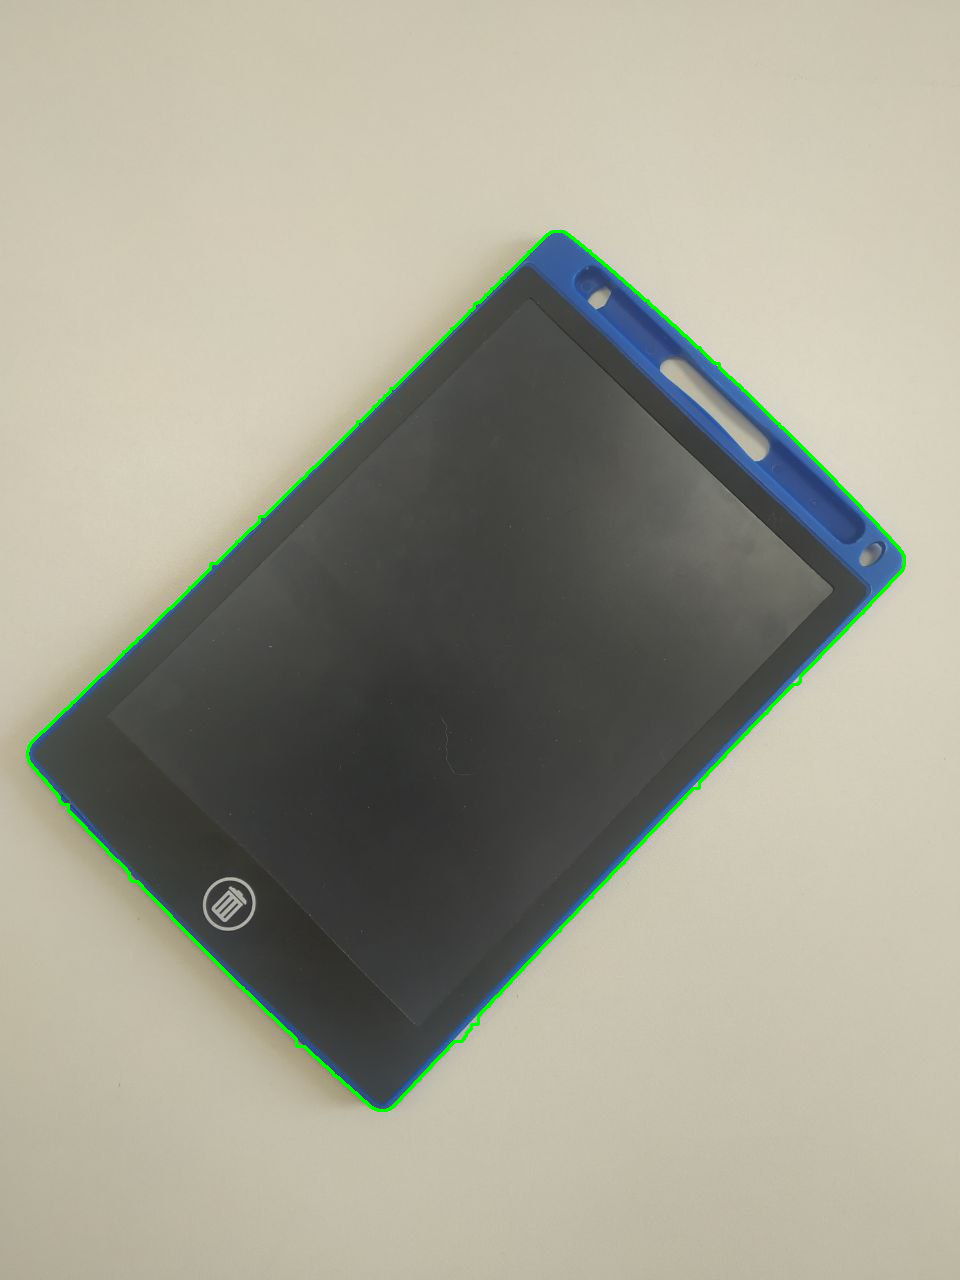

In [31]:
# Отрисовываем полигон на исходном изображении
polygon = cv2.drawContours(image, [polygon_points], -1, (0, 255, 0), 2)

retval, buffer = cv2.imencode('.png', image)
img_png = buffer.tobytes()
Image(data = img_png)

In [32]:
# Вычисляем площадь полигона
area = cv2.contourArea(polygon_points)

# Вычисляем периметр полигона
perimeter = cv2.arcLength(polygon_points, closed=True)

# Выводим площадь и периметр
print("Площадь полигона:", area)
print("Периметр полигона:", perimeter)

Площадь полигона: 385091.0
Периметр полигона: 2597.001572370529
